# Training Account Service Data (6/1/21 - 5/1/22)

In [6]:
import pandas as pd
import numpy as np
# make sure file is in the same folder as this notebook
service_costs = pd.read_csv('AWS Annual Service Costs.csv')
# service_costs
# service_costs.describe()
# service_costs

In [7]:
annual_cost = service_costs.sum(axis=0)
annual_cost_df = annual_cost.to_frame()
annual_cost_new = annual_cost_df.drop(annual_cost_df.index[[0]])
annual_cost_new.rename(columns = {0:'Service Cost'}, inplace = True)
#annual_cost_new.dtypes
# convert object to numeric type (so values can be sorted)
annual_cost_new['Service Cost']=pd.to_numeric(annual_cost_new['Service Cost'])
# disable scientific notation
pd.set_option('display.float_format', lambda x: '%.9f' % x)
#print(annual_cost_new.dtypes)
# sort values ascending
sorted_costs = annual_cost_new.sort_values(by='Service Cost', ascending=False)
# sorted_costs.head(10)

In [9]:
instance_costs = pd.read_csv('ec2_instance_costs.csv')
instance_costs

,Instance Type,c5.xlarge($),t2.medium($),t2.large($),t2.micro($),t3.xlarge($),t2.xlarge($),t2.small($),m1.medium($),t3.micro($),No Instance Type($)
0,6/1/2021,21.845280190,NaN,NaN,64.391469490,NaN,0.000000000,NaN,NaN,NaN,278.787332600
1,7/1/2021,92.160000000,0.707000000,NaN,58.639784830,NaN,0.000000000,0.000000000,NaN,NaN,360.010068800
2,8/1/2021,244.095762400,40.227600000,13.232178430,61.334310420,NaN,NaN,NaN,NaN,NaN,382.794537000
3,9/1/2021,0.000000000,203.616000000,37.476533490,37.456200000,NaN,NaN,NaN,NaN,NaN,430.895643000
4,10/1/2021,121.305071100,223.862800000,146.980491500,60.052189990,NaN,NaN,NaN,NaN,NaN,428.571701900
5,11/1/2021,404.155965600,248.245200000,152.064000000,66.659400000,0.579600000,NaN,NaN,NaN,NaN,383.867658200
6,12/1/2021,408.442000000,255.290000000,157.132800000,69.037600000,NaN,NaN,NaN,0.000000000,NaN,395.025459300
7,1/1/2022,330.537740600,258.423200000,119.051709300,62.232802510,NaN,NaN,NaN,NaN,NaN,339.973676100
8,2/1/2022,NaN,233.254000000,NaN,36.825600000,NaN,NaN,NaN,NaN,NaN,272.177607700
9,3/1/2022,NaN,32.796410900,NaN,12.324077850,NaN,NaN,NaN,NaN,0.000000000,126.731745500


## Cloud Server Costs
*Link to AWS account*: https://jetbridge.aws.fiserv.com/


### Amazon Elastic Compute Cloud (Amazon EC2)

#### Overview

- Amazon EC2 provides scalable computing capacity (using your operating system of choice) in the Amazon Web Services (AWS) Cloud.
>- EC2 is indeed elastic, meaning it is quickly provisioned and can scale up and down on the fly (based on the users' needs)  
- Using Amazon EC2 eliminates your need to invest in hardware up front, so you can develop and deploy applications faster.
- Similar to S3, you only pay for what you use.

#### Key Features of EC2

- *Instances* - virtual computing environments
- *Instance types* - various configurations of CPU, memory, storage, and networking capacity for your instances.
- *Amazon Machine Images (AMIs)* - preconfigured templates for your instances that package the bits you need for your server. (including the operating system and additional software). AMIs simplify the process of building new servers. 
- *Key pairs* - secure login information for your instances using these key pairs (AWS stores the public key, and you store the private key in a secure place).
- *Amazon EBS Volumes* - persistent storage volumes for your data using Amazon Elastic Block Store (Amazon EBS).
- *Regions & Availability Zones* - multiple physical locations for your resources, such as instances and EBS volumes.
- *Security Groups* - use to establish a firewall that enables you to specify the protocols, ports, and source IP ranges that can reach your instances.

#### EC2 Instances

- An EC2 instance is essentially a virtual computing environment or server located in the AWS cloud.
- When you launch an instance, the instance type that you specify determines the hardware of the host computer used for your instance. 
>- There are several instance types. Each instance type offers different compute, memory, and storage capabilities, and is grouped in an instance family based on these capabilities. Each instance type includes one or more instance sizes, allowing you to scale your resources to the requirements of your target workload.

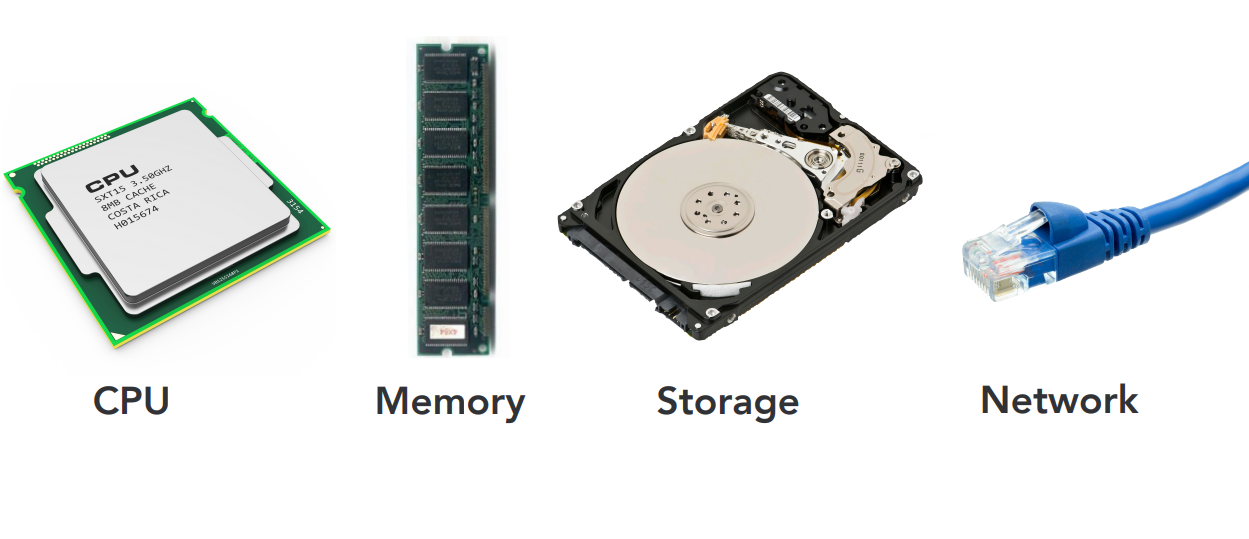

- *Virtualized servers (EC2 instances) may be optimized for any of the above characteristics.*

##### Instance Types
- Depending on a server's role (e.g.if it's a web server versus a database versus a machine learning model builder), we can choose instance types from the following families, which are optimized to fit different use cases (utilizing different variations of the characteristics above).
> 1. **General Purpose** 
>>- Provide a balance of compute, memory and networking resources, and can be used for a variety of diverse workloads. 
>>- These instances are ideal for applications that use these resources in equal proportions (e.g. web servers and code repositories).
>>- Within the general purpose family, there are *burstable performance instances* that use CPU credits (rather that fixed CPU resources) and can build up these credits for times of peak use.
>>>- https://docs.aws.amazon.com/AWSEC2/latest/WindowsGuide/burstable-performance-instances.html
> 2. **Compute Optimized** 
>>- Ideal for compute bound applications that benefit from high performance processors. 
>>- Instances belonging to this family are well suited for batch processing workloads, media transcoding, high performance web servers, high performance computing (HPC), scientific modeling, dedicated gaming servers and ad server engines, machine learning inference and other compute intensive applications.
> 3. **Memory Optimized** 
>>- Designed to deliver fast performance for workloads that process large data sets in memory.
> 4. **Accelerated Computing** 
>>- Use hardware accelerators, or co-processors, to perform functions, such as floating point number calculations, graphics processing, or data pattern matching, more efficiently than is possible in software running on CPUs.
> 5. **Storage Optimized** 
>>- Designed for workloads that require high, sequential read and write access to very large data sets on local storage. 
>>- They are optimized to deliver tens of thousands of low-latency, random I/O operations per second (IOPS) to applications.

*For more granular details on instance types, see the links below:*

https://docs.aws.amazon.com/AWSEC2/latest/WindowsGuide/instance-types.html

https://aws.amazon.com/ec2/instance-types/

### EC2 Pricing

##### Instance Purchasing Options
- Amazon EC2 provides the following purchasing options to enable you to optimize your costs based on your needs:
>- On-Demand Instances
>- Reserved Instances
>- Spot Instances
>- Savings Plan 
>- Dedicated Hosts

>**On-Demand Instances**
>- With On-Demand Instances, you pay for compute capacity by the second with no long-term commitments.
>- You can increase or decrease your compute capacity depending on the demands of your application and only pay the specified per hourly rates for the instance you use.
>- You have full control over its lifecycle—you decide when to launch, stop, hibernate, start, reboot, or terminate it.
>- Recommended to use these instances for applications with short-term, irregular workloads that cannot be interrupted.
>- Because of these instances' flexibility and no commitment policy, on-demand instances are the most expensive pricing model.
>-*On-Demand Pricing Link*: https://aws.amazon.com/ec2/pricing/on-demand/

>**Reserved Instances**
>- Provide you with significant savings on your Amazon EC2 costs compared to On-Demand Instance pricing.
>- Reserved Instances are not physical instances, but rather a billing discount applied to the use of On-Demand Instances in your account.
>>- Must commit to a specific instance type.
>>- These On-Demand Instances must match certain attributes, such as instance type and Region, in order to benefit from the billing discount.
>- AWS  allow users to resell unneeded RIs on the Reserved Instance Marketplace, as well as change the specifications of the instance, including its Availability Zone, the networking type and the instance type. 
>>- *Further documentation:* https://docs.aws.amazon.com/AWSEC2/latest/WindowsGuide/concepts-reserved-instances-application.html

>**Savings Plan**
>- Savings Plans offers significant cost savings in exchange for a commitment to consistent amount of usage for a 1- or 3-year term. 
>- The EC2 Instance Savings Plans offer up to 72% savings compared to On-Demand pricing on your Amazon EC2 Instances usage.
>- AWS offers the Savings Plan through two types: Compute Savings Plan and EC2 Instance Savings Plan.

>> *1. Compute Savings Plan*
>>- Users can commit to a predetermined amount of computing usage over the next 1 or 3 years at highly discounted rates.
>>- Allows changing family, region, size, tenancy, AZ or OS.
>>- Unlike Reserved Instances, the user does not have to commit to rigid services, including type or family of instance.

>> *2. AWS EC2 Savings Plan*
>>- Also available in 1 or 3 year plan.
>>- Very similar to the conventional RI pricing models as it requires users to commit to a single type of instance family and AWS Region for the entire duration of the term plan.
>>- Major difference is that EC2 allows users to chance the Instance Type but within the same family. 


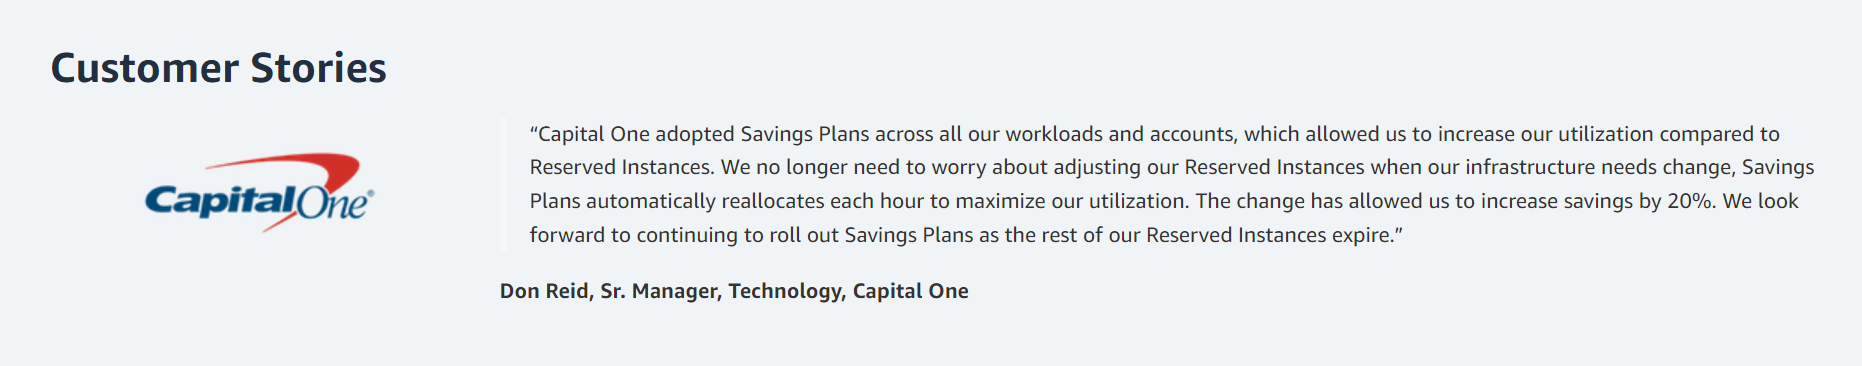

> **Reserved Instances versus Savings Plan**
>> *Similarities*
>>- AWS bills both models by the hour.
>>- RIS and Savings Plans are available in three payment options: all up-front, partial up-front and no up-front.
>>-  Convertible Reserved Instances and Compute Savings Plans offer similar savings; likewise, Standard RIs provide similar discounts to EC2 instance Savings Plan.
>>- When you exceed you usage commitment during your contract period, Amazon applies its regular On-Demand pricing.

>> *Differences*
>>- Reserved Instances are based on the commitment to use an instance at a particular price over a specific period, while Savings Plans are based on the commitment to spend a particular dollar amount per hour over a specific period.
>>- Compute Savings Plans offer multiple locations/regions and usage types, while Convertible Reserved Instances are assigned to a specific location/region, instance type, operating system, and tenant. You cannot change these once you've purchased RIs.
>>- You can queue AWS Savings Plans to apply automatically at a future date rather than immediately. 
>>>- By scheduling Savings Plans to deploy before or after your existing subscription expires, you can avoid using more expensive On-Demand instances.
>>- Savings Plans continue to apply in case of changes in your instances or infrastructure, but RIs have to be monitored continuously to ensure they are applied.
>>>- As a result, Savings Plans may offer lower management overhead than RIs.
>>- You can resell surplus RIs or purchase additional Standard RIs from the AWS Reserved Marketplace; note though, AWS keeps a 12% service fee.
>>- You can also exchange your Convertible RIs to enhance your commitment without resetting your contract. AWS Marketplace does not allow you to sell or buy Savings Plans.
>>- Reserved Instances offer higher discounts, especially over three years. 
>>>- The key to capturing these savings is to ensure they are not underutilized or over-provisioned.

> *Useful Reference Links:* 

>https://www.cloudzero.com/blog/savings-plans-vs-reserved-instances

>https://www.vantage.sh/blog/aws-savings-plans-vs-reserved-instances#:~:text=AWS%20Savings%20Plans%20differ%20from%20Reserved%20Instances%20when,zone%20and%20still%20enjoy%20the%20Savings%20Plan%20discount.

>https://www.cloudysave.com/aws/aws-reserved-instance-vs-savings-plan/#:~:text=The%20only%20difference%20between%20AWS%20EC2%20Savings%20Plan,usage%20within%20the%20same%20region%20and%20instance%20family.

>**Spot Instances**
>-  An instance that uses spare EC2 capacity that is available for less than the On-Demand price.
>- Because Spot Instances enable you to request unused EC2 instances at steep discounts, you can lower your Amazon EC2 costs significantly. 
>>- The hourly price for a Spot Instance is called a Spot price. 
>>- The Spot price of each instance type in each Availability Zone is set by Amazon EC2, and is adjusted gradually based on the long-term supply of and demand for Spot Instances. 
>- Spot Instances are a cost-effective choice if you can be flexible about when your applications run and if your applications can be interrupted.

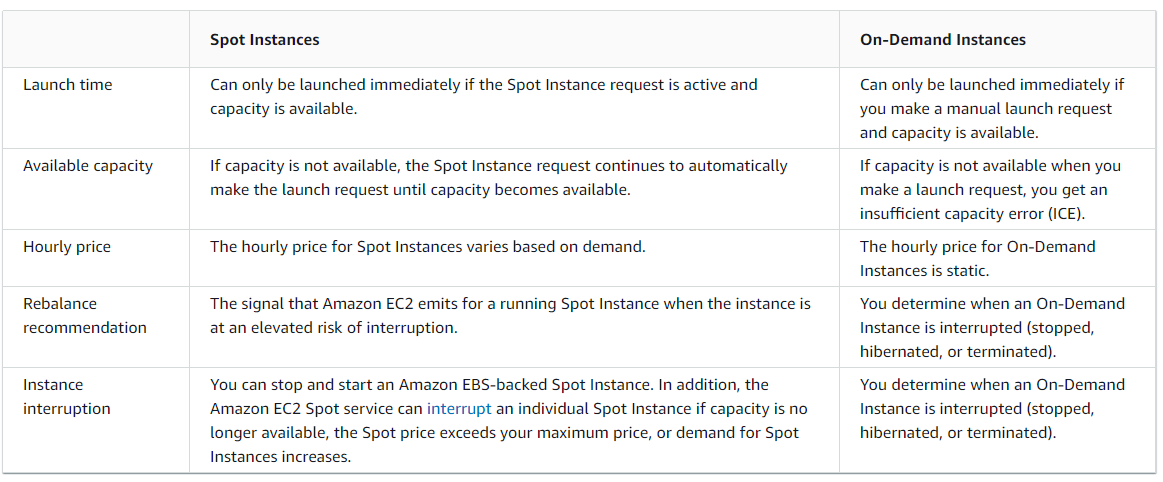

>**Dedicated Hosts**
>- Amazon EC2 Dedicated Hosts allow you to use your eligible software licenses from vendors such as Microsoft and Oracle on Amazon EC2, so that you get the flexibility and cost effectiveness of using your own licenses, but with the resiliency, simplicity and elasticity of AWS. 
>- An Amazon EC2 Dedicated Host is a physical server fully dedicated for your use, so you can help address corporate compliance requirements.

*For more detailed information on instance purchasing options, refer to the documentation link below:*

https://docs.aws.amazon.com/AWSEC2/latest/WindowsGuide/instance-purchasing-options.html

#### General EC2 Pricing Model

**Relevant Factors**
- *Purchasing Plan*
- *Clock hours of server time*
- *Instance Type*
- *Number of instances*
- *Data Transfer*
- *Amazon Elastic Block Storage*
- *Elastic IP Addresses*
- *Elastic Load Balancing*

#### EC2 Significant Billing Questions

**Q: How will I be charged and billed for my use of Amazon EC2?**
- You pay only for what you use. 
- Displayed pricing is an hourly rate but depending on which instances you choose, you pay by the hour or second (minimum of 60 seconds) for each instance type. 
- Partial instance-hours consumed are billed based on instance usage. 
- Data transferred between AWS services in different regions is charged at standard inter-region data transfer rates.* 

**Q: When does the billing of EC2 begin and end?**
- Billing commences when Amazon EC2 initiates the boot sequence of an AMI instance. 
- Billing ends when the instance terminates, which could occur through a web services command, by running "shutdown -h", or through instance failure. 
- When you stop an instance, we shut it down but don't charge hourly usage for a stopped instance, or data transfer fees, but we do charge for the storage for any Amazon EBS volumes.

**Q: What defines billable EC2 instance usage?**
- Instance usages are billed for any time your instances are in a "running" state. 
- If you no longer wish to be charged for your instance, you must "stop" or "terminate" the instance to avoid being billed for additional instance usage. 
- Billing starts when an instance transitions into the running state.

**Q:  If I have two instances in different availability zones, how will I be charged for regional data transfer?**
- Each instance is charged for its data in and data out at corresponding Data Transfer rates. 
- Therefore, if data is transferred between these two instances, it is charged at "Data Transfer Out from EC2 to Another AWS Region" for the first instance and at "Data Transfer In from Another AWS Region" for the second instance. 

**Q: If I have two instances in different regions, how will I be charged for data transfer?**
- Each instance is charged for its data in and data out at Inter-Region Data Transfer rates. 
- Therefore, if data is transferred between these two instances, it is charged at Inter-Region Data Transfer Out for the first instance and at Inter-Region Data Transfer In for the second instance.

**Q: How will my monthly bill show per-second versus per-hour?**
- Although EC2 charges in your monthly bill will now be calculated based on a per second basis, for consistency, the monthly EC2 bill will show cumulative usage for each instance that ran in a given month in decimal hours. 
>- For example, an instance running for 1 hour 10 minutes and 4 seconds would look like 1.1677.
- Each partial instance-hour consumed will be billed per-second for Linux, Windows, Windows with SQL Enterprise, Windows with SQL Standard, and Windows with SQL Web Instances, and as a full hour for all other instance types.

**On-Demand Instance Example**

You are building a Windows application server for your organization.  After conferring
with the application administrators, you learn that the server will need at least 50GB of
memory to operate effectively.  It also needs at least 8 virtual CPU cores, 2 TB of disk
space, and an elastic IP address.  It will run continuously during the 30-day month in the
Northern Virginia region.

*Select an appropriate instance type for this server that meets the requirements specified
above in the most cost-effective manner.  Explain your choice and determine the monthly
cost of operating this server as an on-demand instance.*

On-Demand Pricing Reference: https://aws.amazon.com/ec2/pricing/on-demand/

EBS Storage Link: https://aws.amazon.com/ebs/pricing/


> *Selected Instance Type*
>- r5a.2xlarge (in Memory-Optimized Family).
>>- Has 50+ GB of memory (64 GB) and 8 virtual CPUs.
>>- On-demand hourly rate is .82.

> *Selected EBS Storage Type*
>- gp3  - .08/GB-month

In [4]:
# Monthly Instance Cost 
instance_run_time = 24*30
variable_instance_cost = .82
total_instance_cost = instance_run_time * variable_instance_cost
# Monthly EBS Costs
# 2 TB of disk space needed
# 2 TB = 2000 GB
ebs_storage = 2000
ebs_vol_price = .08
total_ebs_cost = ebs_storage * ebs_vol_price

# Total Cost of Operating the Server
total_server_cost = total_instance_cost + total_ebs_cost

print('The monthly instance cost to run this server is: $'+ str(total_instance_cost))
print('The monthly EBS cost to run this server is: $' + str(total_ebs_cost))
print('The total monthly cost to run this server is: $' + str(total_server_cost))

The monthly instance cost to run this server is: $590.4
The monthly EBS cost to run this server is: $160.0
The total monthly cost to run this server is: $750.4


**Training Account EC2 Cost Summary - December 2021**

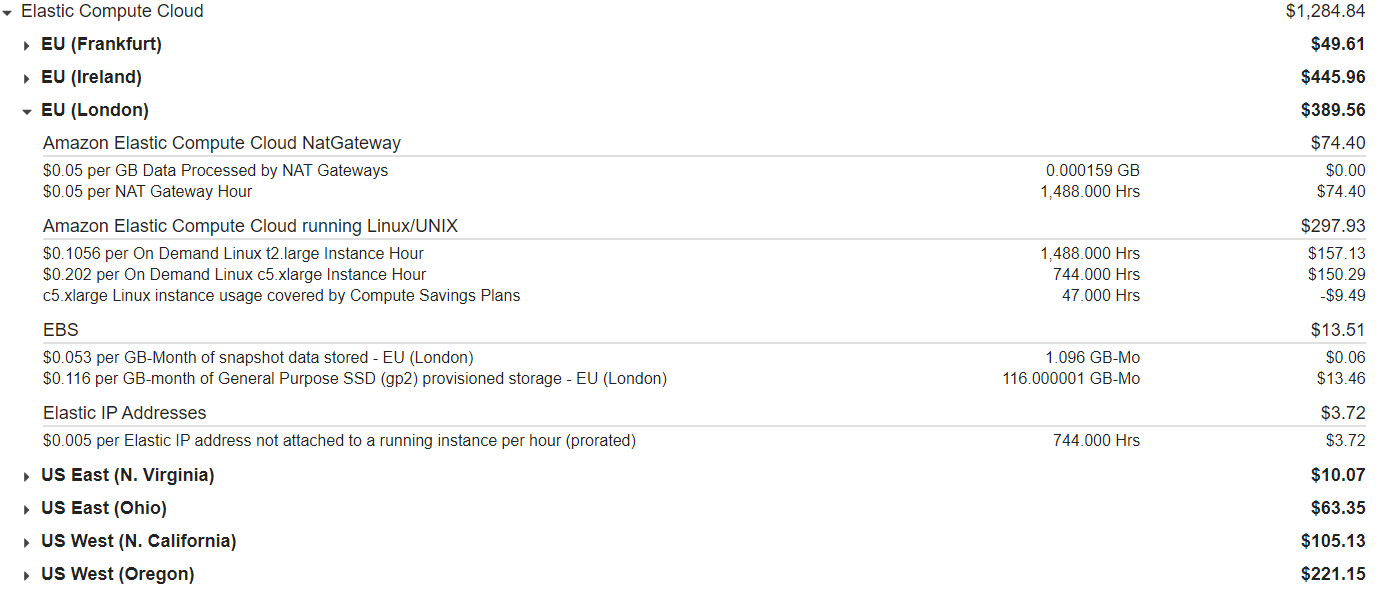